### **Google Playstore Analysis**

### 1. Importing modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize':[9,9]},font_scale=1.2)

### 2. Reading dataset

In [2]:
df=pd.read_csv('/content/googleplaystore_raw.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [3]:
df.shape

(10841, 13)

In [4]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [5]:
obj_col=df.select_dtypes(include=object)
obj_col.columns

Index(['App', 'Category', 'Reviews', 'Size', 'Installs', 'Type', 'Price',
       'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [6]:
numeric_col=df.select_dtypes(exclude=object)
numeric_col.columns

Index(['Rating'], dtype='object')

In [7]:
df.duplicated().sum()

483

In [8]:
df.isnull().sum()


App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [9]:
df.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

### 3. Drop duplicates

In [10]:
df['App'].duplicated().sum()

1181

In [11]:
df['App'].nunique()

9660

In [12]:
df['App'].drop_duplicates().shape


(9660,)

In [13]:
df.drop_duplicates(subset=['App'],keep='first',inplace=True)

### 4. Droping rows

In [14]:
df.drop(index=10472,inplace=True)

In [15]:
np.where(df['Reviews']=='3.0M')

(array([], dtype=int64),)

### 5. Outliers

In [16]:
#boxplot for outliers
def box_plot(df,variable):
  plt.figure(figsize = (18,5))

  plt.subplot(1,3, 1)
  figure=df.boxplot(column=variable)

  plt.subplot(1,3, 2)
  sns.distplot(df[variable])


  plt.subplot(1,3, 3)
  figure=df.plot.hist(variable,bins=50)
  figure.set_title(variable)

In [17]:
##### calculate the boundaries for A Gaussian Distribution which differentiates the outliers

def gauss_dist(df,variable):
  upper_bridge=df[variable].mean() + 3* df[variable].std()
  lower_bridge=df[variable].mean() - 3* df[variable].std()
  return lower_bridge,upper_bridge

In [18]:
#as the distribution is right skewed we use extreme imputation to modify outliers
def ext_imp(df,variable,IQR_index):
#### Lets compute the Interquantile range to calculate the boundaries
  IQR=df[variable].quantile(0.75)-df[variable].quantile(0.25)

  #### Extreme outliers
  lower_bridge=df[variable].quantile(0.25)-(IQR*IQR_index)
  upper_bridge=df[variable].quantile(0.75)+(IQR*IQR_index)

  #print lower and upper boundaries
  return lower_bridge,upper_bridge

 

In [19]:
#modifying the outlier values with the upper and lower values
def fill_outliers(df,variable,lower_bridge,upper_bridge):
  df.loc[df[variable]<=lower_bridge,variable]=lower_bridge
  df.loc[df[variable]>=upper_bridge,variable]=upper_bridge
  

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


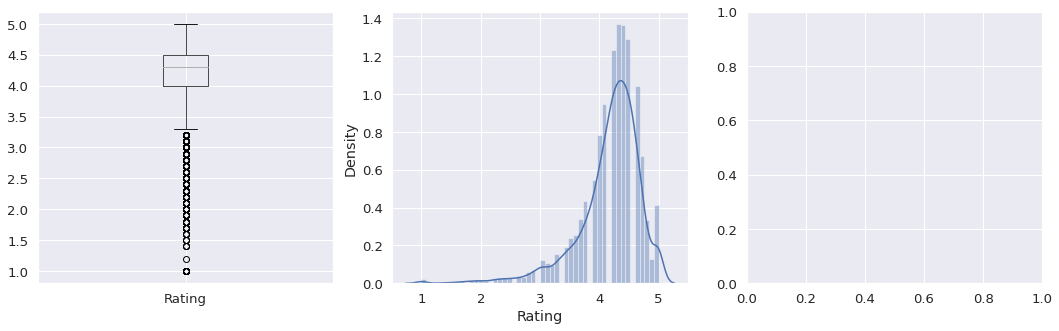

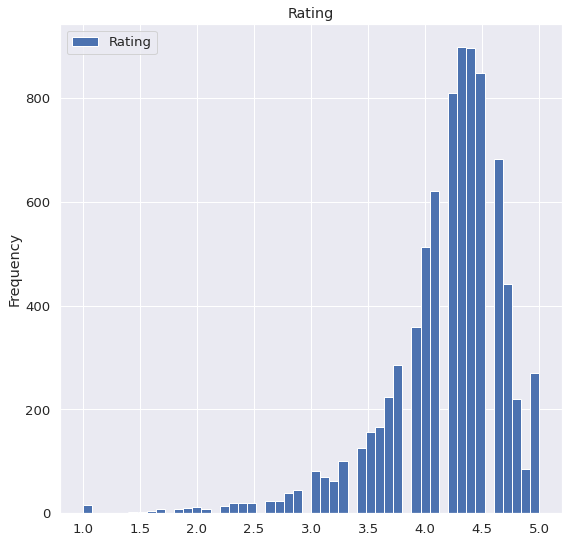

In [20]:
box_plot(df,'Rating')

In [21]:
lower_bridge,upper_bridge=ext_imp(df,'Rating',3)
print(lower_bridge,upper_bridge)

2.5 6.0


In [22]:
lower_bridge,upper_bridge=gauss_dist(df,'Rating')
print(lower_bridge,upper_bridge)

2.5633688542256454 5.783117236550343


In [23]:
fill_outliers(df,'Rating',1,5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


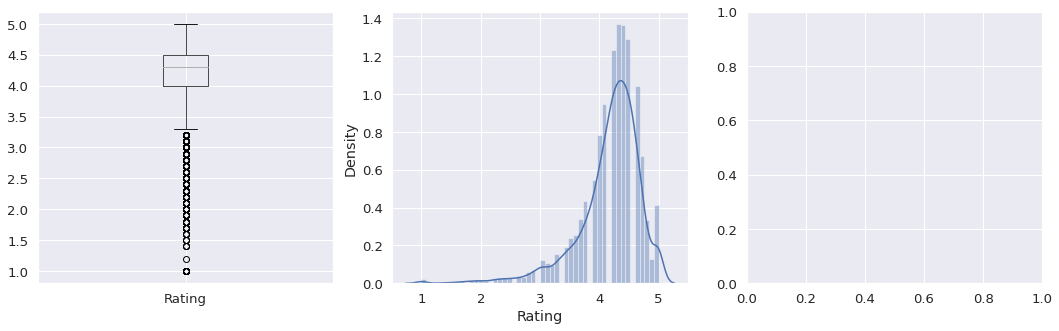

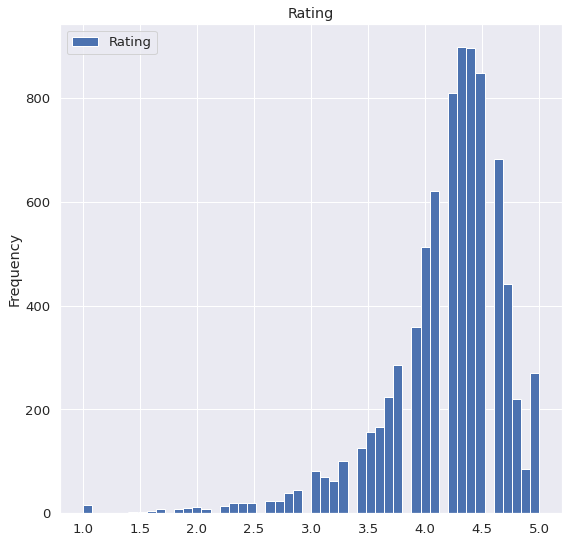

In [24]:
box_plot(df,'Rating')

### 7. Replace values

In [25]:
#to replace and change dtype from string to numeric  
def si_change_dtype(df,variable,old,new):
  df[variable]=df[variable].str.replace(old,new)

In [26]:
si_change_dtype(df,'Content Rating','+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [27]:
si_change_dtype(df,'Installs','+','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
si_change_dtype(df,'Installs',',','')


In [29]:
si_change_dtype(df,'Android Ver','W','')

In [30]:
si_change_dtype(df,'Price','$','')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  This is separate from the ipykernel package so we can avoid doing imports until


In [31]:
si_change_dtype(df,'Content Rating','Mature 17','Adults')

In [32]:
si_change_dtype(df,'Content Rating','Everyone 10','Everyone')

In [33]:
si_change_dtype(df,'Content Rating','Adults only 18','Adults')

In [34]:
si_change_dtype(df,'Category','_',' ')

In [35]:
df['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [36]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART AND DESIGN,4.1,159,19M,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART AND DESIGN,3.9,967,14M,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART AND DESIGN,4.7,87510,8.7M,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


### 8. Replacing method 2

In [37]:
cleared_data_for_size=[]

for i in df['Size']:
    if i[-1]=='k':
        cleared_data_for_size.append(float(i[:-1])/1024)
    elif i[-1]=='M':
        cleared_data_for_size.append(float(i[:-1]))
    else:
        cleared_data_for_size.append(float(0.0))  

#Counter(cleared_data_for_size)
df.Size=pd.Series(cleared_data_for_size)

In [38]:
df['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '7.1 and up', '7.0 - 7.1.1', '8.0 and up',
       '5.0 - 8.0', '3.1 and up', '2.0.1 and up', '4.1 - 7.1.1', nan,
       '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1', '5.0 - 7.1.1'],
      dtype=object)

In [39]:
#replacing unknown values with stats
df['Android Ver'].fillna(str(df['Android Ver'].mode().values[0]),inplace=True)
df['Current Ver'].fillna(str(df['Current Ver'].mode().values[0]),inplace=True)
df['Type'].fillna(str(df['Type'].mode().values[0]),inplace=True)

In [40]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1139
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
dtype: int64

In [41]:
df['Category']=df['Category'].str.title()

### 6. Missing values

#### **missing values functions**
stats(df,variable)

impute_nan(df,variable,mean,median)

nv_plot(df,variable)

impute_nanc(df,variable,mode)

change_col(df,col1,col2)

drop_col(df,col_lst)

rename_col(df,col_dict)

In [42]:
def stats(df,variable):
  
  #to check unique values
  ulst=df[variable].unique()


  #mean of the column
  mean=df[variable].mean()

  #median of the column
  median=df[variable].median()
  
  return ulst,mean,median
 

In [43]:
ulst,mean,median=stats(df,'Rating')
print('unique values:',ulst,'\nmean:',mean,'\nmedian:',median)

unique values: [4.1 3.9 4.7 4.5 4.3 4.4 3.8 4.2 4.6 3.2 4.  nan 4.8 4.9 3.6 3.7 3.3 3.4
 3.5 3.1 5.  2.6 3.  1.9 2.5 2.8 2.7 1.  2.9 2.3 2.2 1.7 2.  1.8 2.4 1.6
 2.1 1.4 1.5 1.2] 
mean: 4.173243045387994 
median: 4.3


In [44]:
#new col for random sample
def impute_nan(df,variable,mean,median):
  df[variable+"_mean"]=df[variable].fillna(mean)
  df[variable+"_median"]=df[variable].fillna(median)
  df[variable+"_random"]=df[variable]
  ##It will have the random sample to fill the na
  random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
  ##pandas need to have same index in order to merge the dataset
  random_sample.index=df[df[variable].isnull()].index
  df.loc[df[variable].isnull(),variable+'_random']=random_sample


In [45]:
impute_nan(df,'Rating',mean,median)

In [46]:
# impute_nan(df,'Size',mean,median)

In [47]:
#plot between 3 methods 
def nv_plot(df,variable):
  fig = plt.figure()
  ax = fig.add_subplot(111)
  df[variable].plot(kind='kde', ax=ax)
  df[variable+'_mean'].plot(kind='kde', ax=ax, color='pink')
  df[variable+'_median'].plot(kind='kde', ax=ax, color='red')
  df[variable+'_random'].plot(kind='kde', ax=ax, color='green')
  lines, labels = ax.get_legend_handles_labels()
  ax.legend(lines, labels, loc='best')

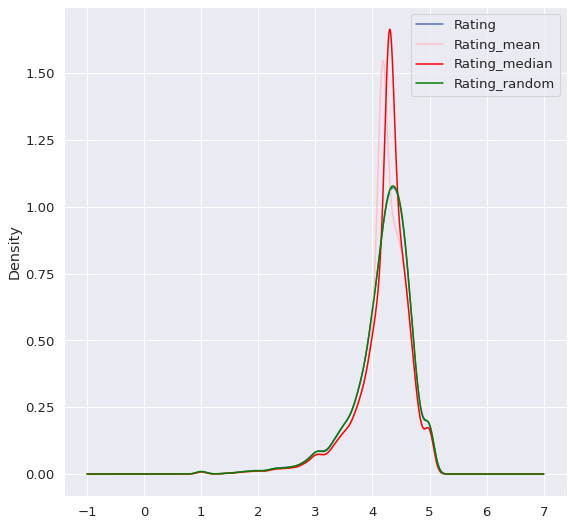

In [48]:
nv_plot(df,'Rating')

In [49]:
sulst,smean,smedian=stats(df,'Size')
print('unique values:',sulst,'\nmean:',smean,'\nmedian:',smedian)

unique values: [1.90000000e+01 1.40000000e+01 8.70000000e+00 2.50000000e+01
 2.80000000e+00 5.60000000e+00 2.90000000e+01 3.30000000e+01
 3.10000000e+00 2.80000000e+01 1.20000000e+01 2.00000000e+01
 2.10000000e+01 3.70000000e+01 2.70000000e+00 5.50000000e+00
 1.70000000e+01 3.90000000e+01 3.10000000e+01 4.20000000e+00
 7.00000000e+00 2.30000000e+01 6.00000000e+00 6.10000000e+00
 4.60000000e+00 9.20000000e+00 5.20000000e+00 1.10000000e+01
 2.40000000e+01 0.00000000e+00 9.40000000e+00 1.50000000e+01
 1.00000000e+01 1.20000000e+00 2.60000000e+01 8.00000000e+00
 7.90000000e+00 5.60000000e+01 5.70000000e+01 3.50000000e+01
 5.40000000e+01 1.96289062e-01 3.60000000e+00 5.70000000e+00
 8.60000000e+00 2.40000000e+00 2.70000000e+01 2.50000000e+00
 1.60000000e+01 3.40000000e+00 8.90000000e+00 3.90000000e+00
 2.90000000e+00 3.80000000e+01 3.20000000e+01 5.40000000e+00
 1.80000000e+01 1.10000000e+00 2.20000000e+00 4.50000000e+00
 9.80000000e+00 5.20000000e+01 9.00000000e+00 6.70000000e+00
 3.000000

In [50]:
impute_nan(df,'Size',smean,smedian)

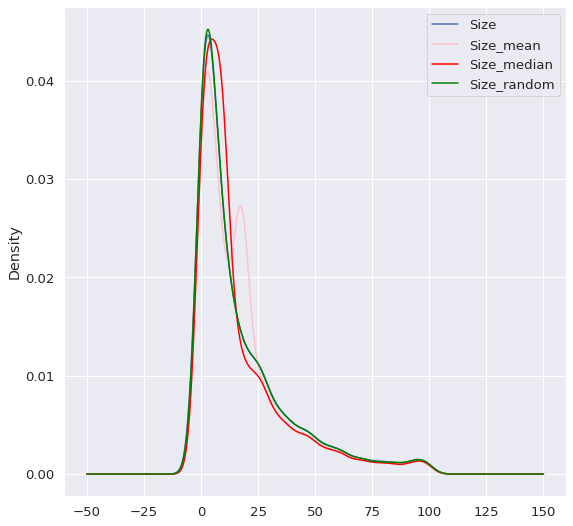

In [51]:
nv_plot(df,'Size')

In [52]:
df.head(20)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_mean,Rating_median,Rating_random,Size_mean,Size_median,Size_random
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,4.1,4.1,4.1,19.0,19.0,19.0
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up,3.9,3.9,3.9,14.0,14.0,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,4.7,4.7,4.7,8.7,8.7,8.7
3,Sketch - Draw & Paint,Art And Design,4.5,215644,25.0,50000000,Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up,4.5,4.5,4.5,25.0,25.0,25.0
4,Pixel Draw - Number Art Coloring Book,Art And Design,4.3,967,2.8,100000,Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up,4.3,4.3,4.3,2.8,2.8,2.8
5,Paper flowers instructions,Art And Design,4.4,167,5.6,50000,Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up,4.4,4.4,4.4,5.6,5.6,5.6
6,Smoke Effect Photo Maker - Smoke Editor,Art And Design,3.8,178,19.0,50000,Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up,3.8,3.8,3.8,19.0,19.0,19.0
7,Infinite Painter,Art And Design,4.1,36815,29.0,1000000,Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up,4.1,4.1,4.1,29.0,29.0,29.0
8,Garden Coloring Book,Art And Design,4.4,13791,33.0,1000000,Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up,4.4,4.4,4.4,33.0,33.0,33.0
9,Kids Paint Free - Drawing Fun,Art And Design,4.7,121,3.1,10000,Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up,4.7,4.7,4.7,3.1,3.1,3.1


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9659 entries, 0 to 10840
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9659 non-null   object 
 1   Category        9659 non-null   object 
 2   Rating          8196 non-null   float64
 3   Reviews         9659 non-null   object 
 4   Size            8520 non-null   float64
 5   Installs        9659 non-null   object 
 6   Type            9659 non-null   object 
 7   Price           9659 non-null   object 
 8   Content Rating  9659 non-null   object 
 9   Genres          9659 non-null   object 
 10  Last Updated    9659 non-null   object 
 11  Current Ver     9659 non-null   object 
 12  Android Ver     9659 non-null   object 
 13  Rating_mean     9659 non-null   float64
 14  Rating_median   9659 non-null   float64
 15  Rating_random   9659 non-null   float64
 16  Size_mean       9659 non-null   float64
 17  Size_median     9659 non-null   

In [54]:
df['Size_median']=df['Size_median'].replace(0.0,df['Size'].median())

In [55]:
#filling null values for categorical variable
def impute_nanc(df,variable,mode):
  df[variable]=df[variable].fillna(mode)

In [56]:
# impute_nanc(df,variable,mode)

In [57]:
df.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size              1139
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          0
Android Ver          0
Rating_mean          0
Rating_median        0
Rating_random        0
Size_mean            0
Size_median          0
Size_random          0
dtype: int64

### 9. Splitting columns

In [58]:
df[['Android Ver','android']]=df['Android Ver'].str.split(' ',expand=True,n=1)

### 10. Changing data type of columns

In [59]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Rating_mean,Rating_median,Rating_random,Size_mean,Size_median,Size_random,android
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,4.1,159,19.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3,4.1,4.1,4.1,19.0,19.0,19.0,and up
1,Coloring book moana,Art And Design,3.9,967,14.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3,3.9,3.9,3.9,14.0,14.0,14.0,and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,4.7,87510,8.7,5000000,Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3,4.7,4.7,4.7,8.7,8.7,8.7,and up


In [60]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
Rating_mean       float64
Rating_median     float64
Rating_random     float64
Size_mean         float64
Size_median       float64
Size_random       float64
android            object
dtype: object

In [61]:
df['Size'].unique()

array([1.90000000e+01, 1.40000000e+01, 8.70000000e+00, 2.50000000e+01,
       2.80000000e+00, 5.60000000e+00, 2.90000000e+01, 3.30000000e+01,
       3.10000000e+00, 2.80000000e+01, 1.20000000e+01, 2.00000000e+01,
       2.10000000e+01, 3.70000000e+01, 2.70000000e+00, 5.50000000e+00,
       1.70000000e+01, 3.90000000e+01, 3.10000000e+01, 4.20000000e+00,
       7.00000000e+00, 2.30000000e+01, 6.00000000e+00, 6.10000000e+00,
       4.60000000e+00, 9.20000000e+00, 5.20000000e+00, 1.10000000e+01,
       2.40000000e+01, 0.00000000e+00, 9.40000000e+00, 1.50000000e+01,
       1.00000000e+01, 1.20000000e+00, 2.60000000e+01, 8.00000000e+00,
       7.90000000e+00, 5.60000000e+01, 5.70000000e+01, 3.50000000e+01,
       5.40000000e+01, 1.96289062e-01, 3.60000000e+00, 5.70000000e+00,
       8.60000000e+00, 2.40000000e+00, 2.70000000e+01, 2.50000000e+00,
       1.60000000e+01, 3.40000000e+00, 8.90000000e+00, 3.90000000e+00,
       2.90000000e+00, 3.80000000e+01, 3.20000000e+01, 5.40000000e+00,
      

In [62]:
df['Last Updated']=pd.to_datetime(df['Last Updated'])

In [63]:
#change dtype from numberic to string
def is_change_dtype(df,variable,datatype):
  df[variable]=df[variable].astype(datatype)

In [64]:
is_change_dtype(df,'Content Rating','object')

In [65]:
is_change_dtype(df,'Reviews','int')

In [66]:
is_change_dtype(df,'Installs','int')

In [67]:
is_change_dtype(df,'Price','float')

### 11. Changing column indices

In [68]:
#changing column indexing
# def change_col(df,col1,col2):
#   titles=list(df.columns)
#   titles[col2],titles[col1]=titles[col1],titles[col2]
#   df=df[titles]




### 12. Removing columns

In [69]:
# #removing other columns
def drop_col(df,col_lst):
  df.drop(columns=col_lst,inplace=True,axis=1)

In [70]:
drop_col(df,['Rating','Size','Rating_mean','Rating_median','android','Genres','Last Updated','Current Ver','Size_mean','Size_random'])

### 13. Renaming columns

In [71]:
df=df.rename(columns=({'Rating_random':'Rating'}))
df=df.rename(columns=({'Size_median':'Size'}))

In [72]:
df.head(3)

,App,Category,Reviews,Installs,Type,Price,Content Rating,Android Ver,Rating,Size
0,Photo Editor & Candy Camera & Grid & ScrapBook,Art And Design,159,10000,Free,0.0,Everyone,4.0.3,4.1,19.0
1,Coloring book moana,Art And Design,967,500000,Free,0.0,Everyone,4.0.3,3.9,14.0
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",Art And Design,87510,5000000,Free,0.0,Everyone,4.0.3,4.7,8.7


### 14. EDA

In [73]:
#what is the most expensive app on the store
df[df['Price']==df['Price'].max()]

,App,Category,Reviews,Installs,Type,Price,Content Rating,Android Ver,Rating,Size
4367,I'm Rich - Trump Edition,Lifestyle,275,10000,Paid,400.0,Everyone,4.1,3.6,9.1


In [74]:
#which genre has more apps
df['Category'].value_counts()

Family                 1832
Game                    959
Tools                   827
Business                420
Medical                 395
Personalization         376
Productivity            374
Lifestyle               369
Finance                 345
Sports                  325
Communication           315
Health And Fitness      288
Photography             281
News And Magazines      254
Social                  239
Books And Reference     222
Travel And Local        219
Shopping                202
Dating                  171
Video Players           163
Maps And Navigation     131
Education               119
Food And Drink          112
Entertainment           102
Auto And Vehicles        85
Libraries And Demo       84
Weather                  79
House And Home           74
Events                   64
Art And Design           64
Parenting                60
Comics                   56
Beauty                   53
Name: Category, dtype: int64

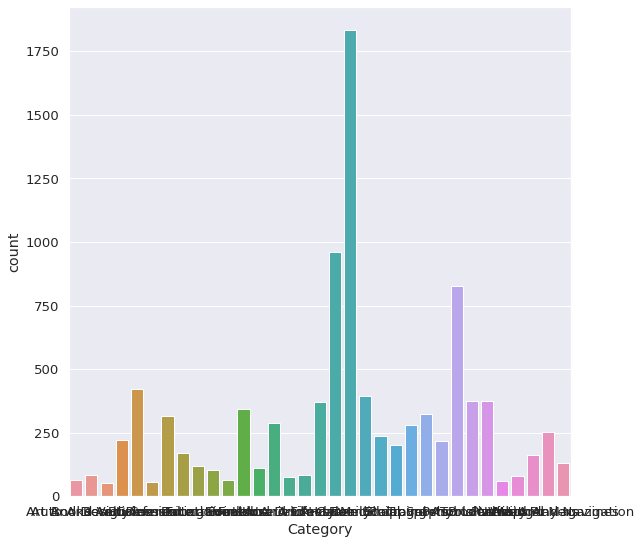

In [75]:
sns.countplot(x='Category',data=df)

In [76]:
#what is the average size of the free apps and paid apps
df.groupby('Type').mean()['Size']

Type
Free    17.667060
Paid    18.108915
Name: Size, dtype: float64

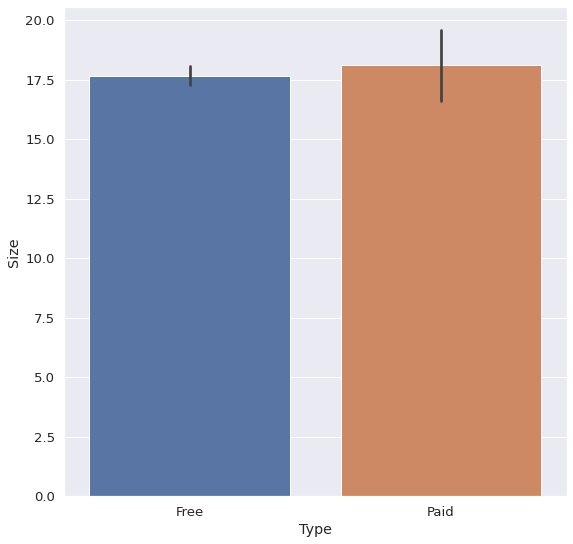

In [77]:
sns.barplot(x='Type',y='Size',estimator=np.mean,data=df)

In [78]:
#what are the 5 top expensive apps that has rate of 5
df[df['Rating']==5].sort_values(by='Price',ascending=False).head(5)

,App,Category,Reviews,Installs,Type,Price,Content Rating,Android Ver,Rating,Size
5489,AP Art History Flashcards,Family,1,10,Paid,29.99,Adults,4.0,5.0,8.6
7477,USMLE Step 2 CK Flashcards,Family,1,10,Paid,19.99,Everyone,2.2,5.0,1.7
4697,FORD V SERIES CALC - NO LIMIT,Auto And Vehicles,2,50,Paid,9.99,Everyone,4.0,5.0,25.0
8616,MC.Fitting,Productivity,130,1000,Paid,8.49,Everyone,1.6,5.0,92.0
5482,meStudying: AP English Lit,Family,1,10,Paid,4.99,Everyone,2.0.1,5.0,10.0


In [79]:
#how many apps that has more than 50k reviews
df[df['Reviews']>5000].sort_values(by='Reviews',ascending=False)

,App,Category,Reviews,Installs,Type,Price,Content Rating,Android Ver,Rating,Size
2544,Facebook,Social,78158306,1000000000,Free,0.0,Teen,Varies,4.1,9.1
336,WhatsApp Messenger,Communication,69119316,1000000000,Free,0.0,Everyone,Varies,4.4,9.1
2545,Instagram,Social,66577313,1000000000,Free,0.0,Teen,Varies,4.5,9.1
335,Messenger – Text and Video Chat for Free,Communication,56642847,1000000000,Free,0.0,Everyone,Varies,4.0,9.1
1670,Clash of Clans,Game,44891723,100000000,Free,0.0,Everyone,4.1,4.6,36.0
...,...,...,...,...,...,...,...,...,...,...
1433,Brain Waves - Binaural Beats,Health And Fitness,5038,500000,Free,0.0,Everyone,4.4,4.4,38.0
32,Anime Manga Coloring Book,Art And Design,5035,100000,Free,0.0,Everyone,4.0,4.5,11.0
7508,DAILY: Free Classifieds App for Android,Lifestyle,5025,500000,Free,0.0,Adults,Varies,4.1,5.9
10275,Mobile FC,Sports,5015,100000,Free,0.0,Everyone,4.0.3,4.1,9.1


In [80]:
#what is the average price of the appsfor each genre with each installs numbers
x=pd.pivot_table(index='Category',columns='Installs',values='Price',data=df,aggfunc=np.mean)
x.head()

Installs,0,1,5,10,50,100,500,1000,5000,10000,50000,100000,500000,1000000,5000000,10000000,50000000,100000000,500000000,1000000000
Category,,,,,,,,,,,,,,,,,,,,
Art And Design,0.0,NaN,NaN,NaN,NaN,0.000000,NaN,0.663333,0.398000,0.180909,0.000,0.000000,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
Auto And Vehicles,NaN,0.00,0.000000,0.000000,9.990000,0.248333,0.000000,0.000000,0.000000,0.000000,0.398,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
Beauty,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
Books And Reference,NaN,5.99,1.852857,3.996842,0.583333,0.570000,0.220000,0.149118,0.474375,0.179600,0.000,0.000000,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0
Business,0.0,0.00,0.055000,2.201905,0.359600,0.432763,0.782174,0.183265,0.000000,0.065000,0.000,0.332667,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN


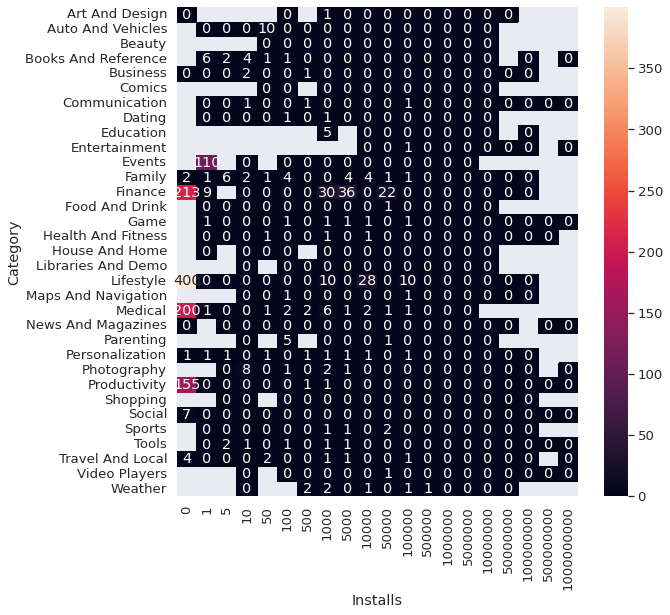

In [81]:
sns.heatmap(x,annot=True,fmt='0.0f')

In [82]:
#how many apps have rating>4.7 and what is their average price
df[df['Rating']>4.7]['Price'].mean()

0.4544771723122239

In [83]:
#how much google earned from 5000000 installed apps
df.groupby('Installs').sum()['Price']

Installs
0             1205.41
1              179.29
5               71.38
10             447.76
50             109.72
100            799.78
500            134.62
1000          2416.67
5000          1416.98
10000         2374.41
50000          583.88
100000         782.56
500000          34.39
1000000         53.30
5000000          0.00
10000000         7.98
50000000         0.00
100000000        0.00
500000000        0.00
1000000000       0.00
Name: Price, dtype: float64

In [84]:
#what is the minimum and maximum size of free and paid apps
df.groupby('Type').describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Type,,,,,,,,
Free,8903.0,17.667060,19.659784,0.008301,6.000,9.1,22.0,100.0
Paid,756.0,18.108915,20.067313,0.016602,5.775,9.1,25.0,100.0


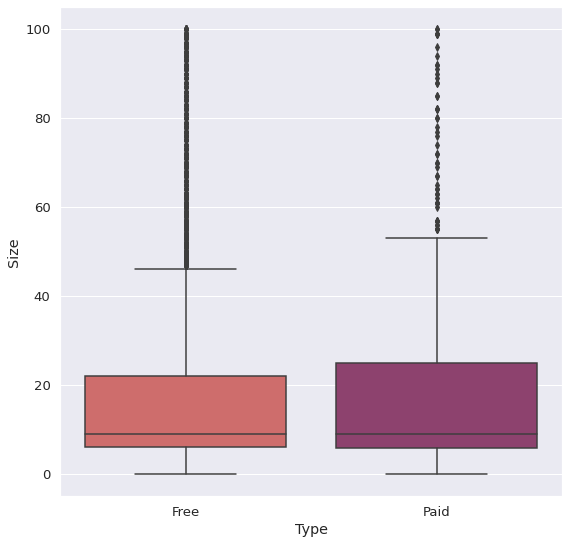

In [85]:
sns.boxplot(x='Type',y='Size',data=df,palette='flare')

In [86]:
#Is there any correlation between ratings,reviews,size with the price of the app
df.corr()['Price']

Reviews    -0.007598
Installs   -0.009405
Price       1.000000
Rating     -0.019580
Size       -0.014865
Name: Price, dtype: float64

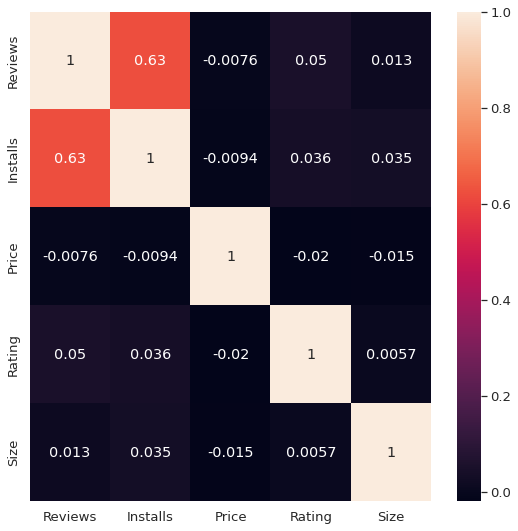

In [87]:
sns.heatmap(df.corr(),annot=True)

In [88]:
#how many apps for each type for each content reading
y=pd.pivot_table(index='Type',columns='Content Rating',values='Rating',data=df,aggfunc='count')
y

Content Rating,Adults,Everyone,Teen,Unrated
Type,,,,
Free,378.0,7539.0,984.0,2.0
Paid,18.0,686.0,52.0,NaN


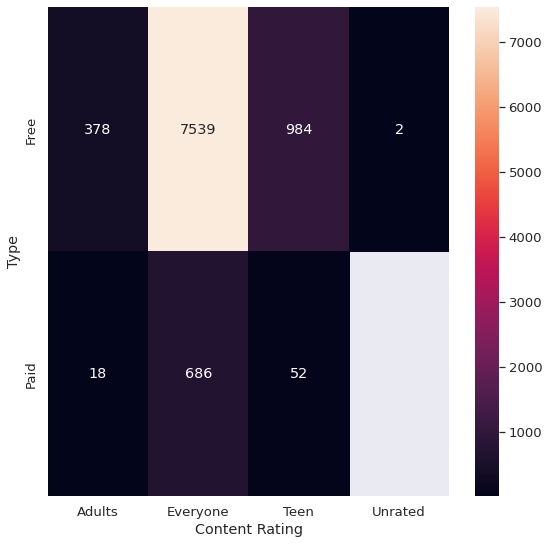

In [89]:
sns.heatmap(y,annot=True,fmt='0.0f')

In [90]:
#how many apps that can work on android version 4
df[df['Android Ver'].str[0]=='4'].value_counts()

App                                                 Category            Reviews  Installs  Type  Price  Content Rating  Android Ver  Rating  Size     
"i DT" Fútbol. Todos Somos Técnicos.                Sports              27       500       Free  0.00   Everyone        4.1          4.2     1.000000     1
Music for Youtube - Tube Music BG, Red+             Video Players       47       1000      Free  0.00   Teen            4.2          4.3     9.100000     1
Music - Mp3 Player                                  Video Players       259605   10000000  Free  0.00   Everyone        4.0.3        4.4     9.100000     1
Muscle Trigger Point Anatomy                        Medical             1361     50000     Paid  2.99   Everyone        4.0.3        4.4     51.000000    1
Muscle Premium - Human Anatomy, Kinesiology, Bones  Medical             168      10000     Paid  24.99  Everyone        4.4          4.2     9.100000     1
                                                                     

### 15. Saving files

In [91]:
df.to_csv("google_playstore_cleaned_data.csv",index=False);